In [1]:
%load_ext autoreload
%autoreload 2
import uproot
import ROOT
import numpy as np
import re
import matplotlib.pyplot as plt
import pandas as pd
import forestplot as fp


# Load style sheet

signal = uproot.open("../TTbarSemileptonic_cbOnly_pruned_optimized_MuonSelection.root")["Events"]
background = uproot.open("../TTbarSemileptonic_Nocb_optimized_MuonSelection.root")["Events"]

Welcome to JupyROOT 6.26/10


In [2]:
def rank(key):
    if bool(re.match("Muon_*",key)):
        key=f"{key}[:,0]"
    signal_array=signal.arrays(key,library="pd")
    background_array=background.arrays(key,library="pd")
    if signal_array[key].dtype!=np.bool_:
        signal_hist = np.histogram(signal_array[key], bins=60, range=(
            np.min(signal_array[key]), np.max(signal_array[key])))[0]
        signal_hist=signal_hist/signal_hist.sum()
        background_hist = np.histogram(background_array[key], bins=60, range=(
            np.min(signal_array[key]), np.max(signal_array[key])))[0]
        background_hist=background_hist/background_hist.sum()
        return np.sum(np.abs(signal_hist-background_hist))*0.5
    else:
        return -1

In [3]:
rank_dict={}
for key in signal.keys():
    if bool(re.match("(Jet|Muon|MET)_*", key)):
        ranking=rank(key)
        if ranking!=-1:
            rank_dict[key]=ranking

In [43]:
rank_dict

{'JetMask': 0.003661501051268501,
 'Jet_area': 0.004319705327847191,
 'Jet_bRegCorr': 0.021789727824440608,
 'Jet_bRegRes': 0.009007469320648248,
 'Jet_btagCSVV2': 0.12667916182884165,
 'Jet_btagDeepB': 0.12893658887122886,
 'Jet_btagDeepCvB': 0.11008517870125134,
 'Jet_btagDeepCvL': 0.13037157264486796,
 'Jet_btagDeepFlavB': 0.1351423048599288,
 'Jet_btagDeepFlavCvB': 0.11713364119059161,
 'Jet_btagDeepFlavCvL': 0.13639195810992638,
 'Jet_btagDeepFlavQG': 0.03956017837831451,
 'Jet_cRegCorr': 0.021561457404033257,
 'Jet_cRegRes': 0.017943758475204217,
 'Jet_chEmEF': 0.015454135386528449,
 'Jet_chFPV0EF': 0.018372291352970613,
 'Jet_chHEF': 0.018107051497792605,
 'Jet_cleanmask': 0.027177204653800274,
 'Jet_electronIdx1': 0.008239718241206865,
 'Jet_electronIdx2': 0.0010091793222779927,
 'Jet_eta': 0.004857640181936354,
 'Jet_genJetIdx': 0.005584727260487062,
 'Jet_hadronFlavour': 0.20671601491847888,
 'Jet_hfadjacentEtaStripsSize': 0.00016651204989257622,
 'Jet_hfcentralEtaStripSize':

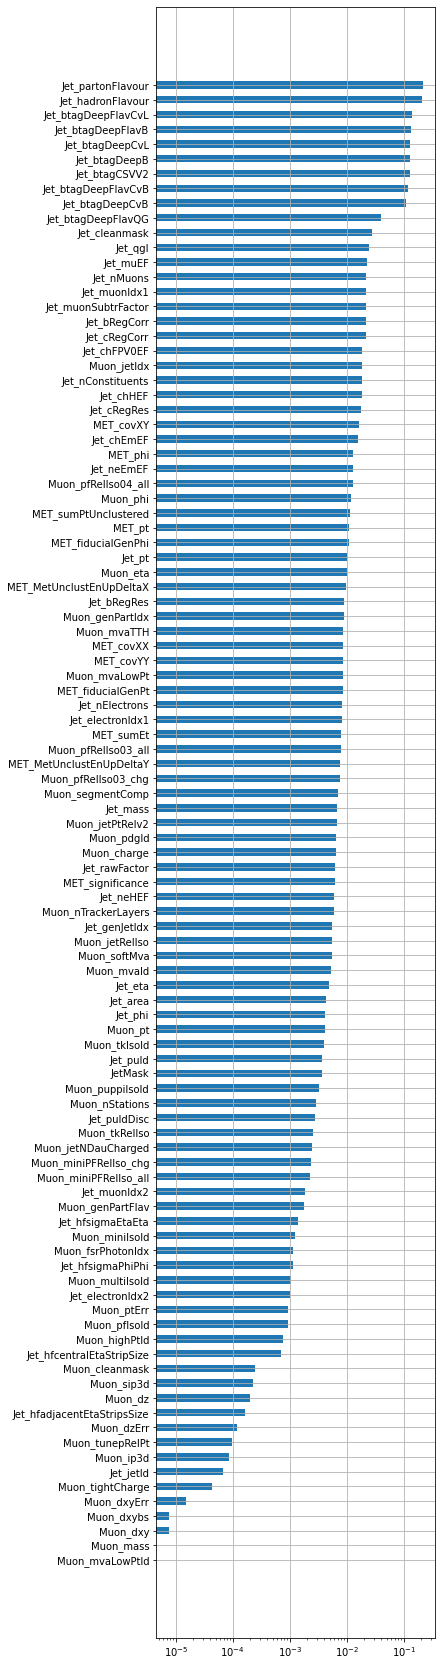

In [4]:
values=np.sort(np.array(list(rank_dict.values())))
keys=np.array(list(rank_dict.keys()))[np.argsort(np.array(list(rank_dict.values())))]

plt.figure(figsize=(5,30))
plt.barh(np.arange(len(rank_dict)), values,
         height=0.5, tick_label=keys)
plt.xscale("log")
plt.grid()
